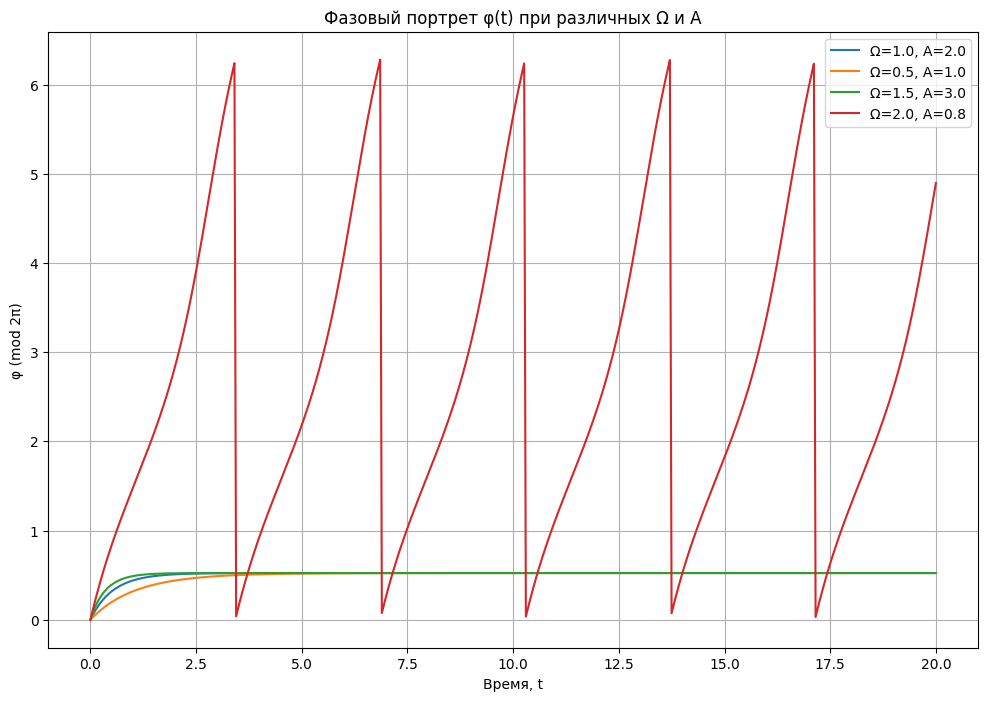

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Определяем дифференциальное уравнение (без изменений)
def diff_eq(phi, t, Omega, A):
    return Omega - A * np.sin(phi)

# Задаем несколько наборов параметров
params = [
    (1.0, 2.0), # Ω = 1, A = 2 (пример из предыдущего кода)
    (0.5, 1.0), # Ω = 0.5, A = 1
    (1.5, 3.0), # Ω = 1.5, A = 3
    (2.0, 0.8)   # Ω = 2, A = 0.8
]

# Устанавливаем начальное условие и временной диапазон
phi0 = 0.0
t = np.linspace(0, 20, 500)

# Решаем дифференциальное уравнение для каждого набора параметров
plt.figure(figsize=(12, 8))
for i, (Omega, A) in enumerate(params):
    phi = odeint(diff_eq, phi0, t, args=(Omega, A))
    plt.plot(t, np.mod(phi, 2 * np.pi), label=f'Ω={Omega}, A={A}')

# Добавляем подписи и сетку
plt.title('Фазовый портрет φ(t) при различных Ω и A')
plt.xlabel('Время, t')
plt.ylabel('φ (mod 2π)')
plt.legend()
plt.grid(True)
plt.show()



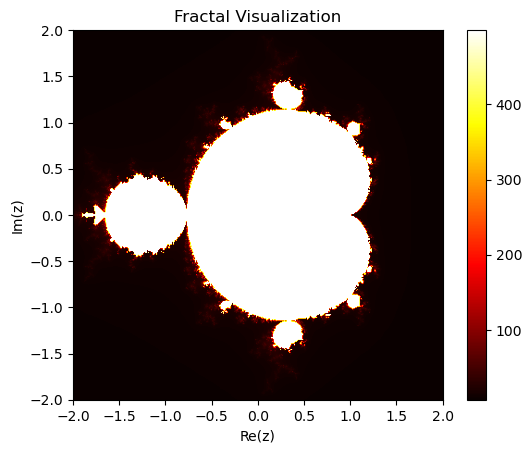

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры фрактала
seed = complex(0.56667, 0)
power1 = 2
induct = complex(-0.5, 0)
bailout = 1.0e20

# Размеры изображения
width, height = 400, 400
x_min, x_max = -2, 2
y_min, y_max = -2, 2

# Создаем массивы координат
x = np.linspace(x_min, x_max, width)
y = np.linspace(y_min, y_max, height)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y  # Комплексные числа

# Начальное значение z
Z = np.zeros(C.shape, dtype=np.complex128)

# Итерации
max_iterations = 500
image = np.zeros(C.shape, dtype=int)

for iteration in range(max_iterations):
    mask = np.abs(Z) < bailout  # Массив маски для значений, которые еще не вышли за пределы
    image[mask] = iteration  # Обновляем значения в изображении
    Z[mask] = Z[mask] ** power1 + C[mask] * seed + induct * Z[mask]  # Обновляем Z только для значений, которые не вышли за пределы

# Визуализация
plt.imshow(image, extent=(x_min, x_max, y_min, y_max), cmap='hot')
plt.colorbar()
plt.title('Fractal Visualization')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()


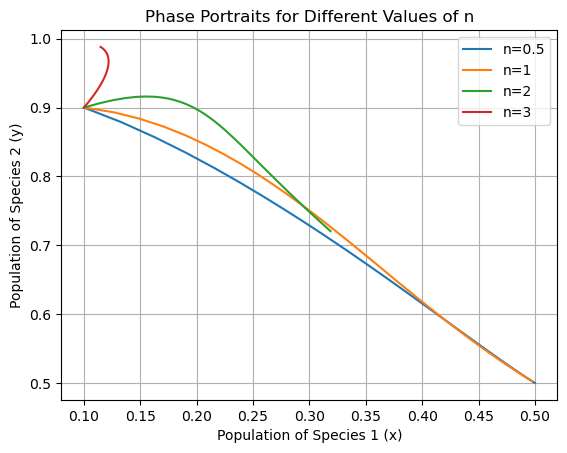

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def model(x, y, theta, n):
    """
    This function implements the model for competitive interaction of two species.

    Args:
        x: Population size of species 1.
        y: Population size of species 2.
        theta: Parameter of the model.
        n: Parameter of the model.

    Returns:
        A tuple containing the growth rates of species 1 and 2, respectively.
    """
    dx = (theta**n) / (theta**n + y**n) - x
    dy = (theta**n) / (theta**n + x**n) - y
    return dx, dy

# Define the parameters
theta = 1/2
n_values = [0.5, 1, 2, 3]

# Define the time interval
t_span = (0, 10)

# Define the initial conditions
x0 = 0.1
y0 = 0.9

# Prepare the plot
plt.figure()

# Plot the phase portraits for different values of n
for n in n_values:
    # Solve the system of differential equations using the forward Euler method
    t = np.linspace(t_span[0], t_span[1], 100)
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0] = x0
    y[0] = y0
    for i in range(len(t) - 1):
        dx, dy = model(x[i], y[i], theta, n)
        x[i + 1] = x[i] + dx * (t[i + 1] - t[i])
        y[i + 1] = y[i] + dy * (t[i + 1] - t[i])

    # Plot the phase portrait on the same graph
    plt.plot(x, y, label=f'n={n}')

# Add labels and title
plt.xlabel('Population of Species 1 (x)')
plt.ylabel('Population of Species 2 (y)')
plt.title('Phase Portraits for Different Values of n')
plt.legend()
plt.grid()
plt.show()